# Memetic algorithm

Импортируем библиотеки

In [1]:
import time
import numpy as np 
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import ast
%matplotlib inline

from memetic_algorithm import Population, Memetic

Генерируем данные

In [ ]:
def get_product(n=[50, 100, 200, 500], m=[4, 6, 10, 12, 20, 30], k=range(3, 14)):
    return list(itertools.product(n, m, k))

class MEME:
    
    def __init__(self):
        self.dataframe = pd.DataFrame()

    def get_data(self, dct, repeat=20):
        result_product = get_product(**dct)
        for params in result_product:
            for item in range(repeat):
                print(params)
                number_of_vectors, vectors_dimension, number_of_groups = params
                np.random.seed(42)
                vectors = np.random.random(size=(number_of_vectors, vectors_dimension))
                population = Population(population=None, #можно самостоятельно инициализировать первое поколение
                                        population_size=20, #размер поколения, если оно генерируется автоматически
                                        random_state=42, 
                                        number_of_vectors=number_of_vectors, 
                                        vectors_dimension=vectors_dimension,
                                        number_of_groups=number_of_groups,  
                                        crossover_percent=0.85,
                                        mutation_probability=0.1
                                       )
                start_time = time.time()
                value, solution = Memetic.solve(vectors, population, number_of_steps=100)
                idf = list(Memetic.solutions)[-1]
                data = {**{'id':idf, 
                           'n':number_of_vectors,
                           'm':vectors_dimension,
                           'k':number_of_groups,
                          'time_to_solve': time.time() - start_time}, 
                        **Memetic.solutions[idf]
                       }
                self.dataframe = self.dataframe.append(data, ignore_index=True)

In [ ]:
dictionary = {'n': range(50, 550, 50), 'm': range(2, 20), 'k': range(2, 20)}

In [ ]:
m = MEME()
m.get_data(dictionary,repeat = 1)

**Export**

In [ ]:
data_export = m.dataframe.drop(columns=['end population', 'start population'])
data_export.head()

In [ ]:
data_export.to_csv('data.csv', index = False)

**Import**

In [2]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [3]:
data_import = pd.read_csv('data.csv', converters={'objective function story': from_np_array,
                                          'solution': from_np_array})
data_import[['id', 'k', 'm', 'n']] = data_import[['id', 'k', 'm', 'n']].astype(int)
data_import.head()

,id,k,m,n,objective function story,solution,time_to_solve,value
0,1,2,2,50,"[0.47584631, 0.47584631, 0.24758661, 0.2475866...","[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...",1.164920,0.047127
1,2,3,2,50,"[1.48820469, 1.48820469, 1.48820469, 1.3550513...","[1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, ...",1.196327,0.351419
2,3,4,2,50,"[1.79457419, 1.79426614, 0.8395027, 0.8395027,...","[1, 2, 3, 2, 0, 1, 1, 0, 3, 1, 1, 3, 0, 3, 0, ...",1.172332,0.792145
3,4,5,2,50,"[2.10711837, 2.09078029, 2.09078029, 1.3625164...","[0, 3, 2, 2, 4, 3, 0, 1, 2, 4, 1, 3, 4, 1, 0, ...",1.224292,0.730854
4,5,6,2,50,"[2.65052987, 2.65052987, 2.39428408, 1.9282981...","[2, 4, 1, 3, 1, 5, 5, 4, 2, 2, 3, 1, 1, 2, 4, ...",1.293263,1.415622


## 1 Plots

### 1.1 Зависимость значения целевой функции от количества векторов

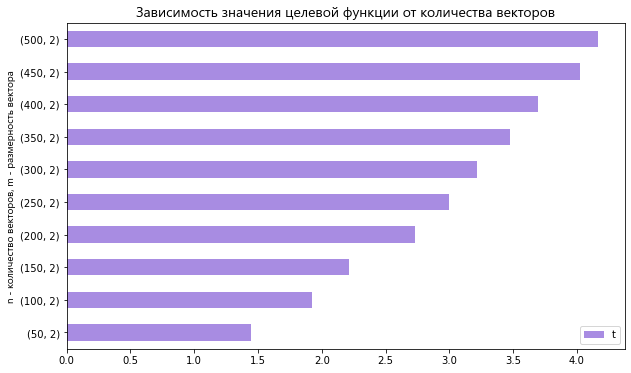

In [5]:
solegr = data_import.groupby(by = ['n','m']).mean().iloc[:, -2:]
ax = solegr[solegr.index.get_level_values('m').isin([2])].value.plot(kind = 'barh', 
                                                                     figsize=(10,6),
                                                                     label='t',
                                                                     color = 'mediumpurple',
                                                                     alpha = 0.8)
ax.set_title("Зависимость значения целевой функции от количества векторов", fontsize=14,fontname='Segoe UI')
ax.set_ylabel("n - количество векторов, m - размерность вектора",fontname='Segoe UI')
ax.legend()
plt.show()

### 1.2 m = const

In [6]:
d1 = data_import[data_import['m'] == 5]
d2 = d1.groupby(by=['k','n']).mean()
d3 = d2[(d2.index.get_level_values('k').isin([5, 10, 15])) & (d2.index.get_level_values('n').isin([50,200,450]))].iloc[:,-2]

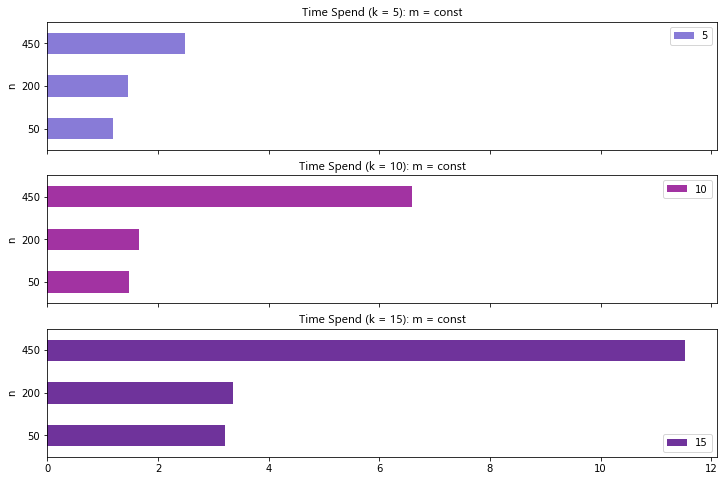

In [7]:
ax = d3.unstack\
(level =0).plot(kind='barh', 
                subplots=True, 
                figsize=(12,8),
                color = ['slateblue','darkmagenta','indigo'],
                alpha = 0.8)
ax[0].set_title("Time Spend (k = 5): m = const", fontname='Segoe UI')
ax[1].set_title("Time Spend (k = 10): m = const", fontname='Segoe UI')
ax[2].set_title("Time Spend (k = 15): m = const", fontname='Segoe UI')
plt.show()

### 1.3 n = const

In [8]:
d1 = data_import[data_import['n'] == 450]
d2 = d1.groupby(by=['m','k']).mean()
d3 = d2[(d2.index.get_level_values('k').isin([5, 10, 15])) & (d2.index.get_level_values('m').isin([5,10,15]))].iloc[:,-2]

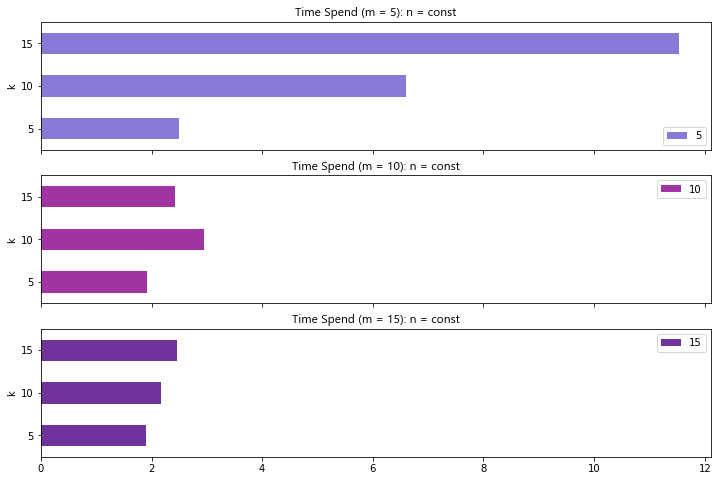

In [9]:
ax = d3.unstack\
(level =0).plot(kind='barh', 
                subplots=True, 
                figsize=(12,8),
                color = ['slateblue','darkmagenta','indigo'], 
                alpha = 0.8)

ax[0].set_title("Time Spend (m = 5): n = const", fontname='Segoe UI')
ax[1].set_title("Time Spend (m = 10): n = const", fontname='Segoe UI')
ax[2].set_title("Time Spend (m = 15): n = const", fontname='Segoe UI')
plt.show()

## 2. Tables

In [10]:
grouped_n = data_import.groupby(by = ['n']).mean().iloc[:, -2:]
grouped_n

,time_to_solve,value
n,,
50,2.048888,2.403725
100,2.036844,3.269183
150,1.899117,3.953067
200,2.525351,4.554296
250,2.878323,5.097604
300,2.255143,5.540543
350,2.229044,5.991761
400,2.077865,6.406521
450,2.918739,6.736689


In [11]:
grouped_n.max()

time_to_solve    3.202217
value            7.094062
dtype: float64

In [12]:
grouped_n.min()

time_to_solve    1.899117
value            2.403725
dtype: float64

In [13]:
grouped_k = data_import.groupby(by = ['k']).mean().iloc[:, -2:]
grouped_k

,time_to_solve,value
k,,
2,1.825516,2.444778
3,1.823332,3.823023
4,1.956940,4.540368
5,1.992077,4.928055
6,2.094344,5.171793
7,2.190889,5.316018
8,2.188847,5.431026
9,2.290867,5.419571
10,2.400483,5.459042


In [14]:
grouped_k.max()

time_to_solve    3.009510
value            5.529185
dtype: float64

In [15]:
grouped_k.min()

time_to_solve    1.823332
value            2.444778
dtype: float64

In [16]:
grouped_m = data_import.groupby(by = ['m']).mean().iloc[:, -2:]
grouped_m

,time_to_solve,value
m,,
2,2.295759,2.988650
3,2.027799,3.612560
4,2.257687,4.017250
5,2.636539,4.348858
6,2.686579,4.651514
7,2.415409,4.777311
8,2.472800,5.045640
9,2.466732,5.161228
10,2.424999,5.276690


In [17]:
grouped_m.max()

time_to_solve    2.686579
value            6.039820
dtype: float64

In [ ]:
grouped_m.min()